In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("insurance.csv")

In [228]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [231]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [232]:
df.shape

(1338, 7)

In [233]:
has_duplicate = df.duplicated().any()
tt_duplicate = df.duplicated().sum()


In [234]:
if has_duplicate:
    print(f"O Dataframe possui {has_duplicate} dado(s) duplicado(s)")
else:
    print("O Dataframe não possui dado(s) duplicado(s)")

O Dataframe possui True dado(s) duplicado(s)


In [235]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [236]:
df = df.drop_duplicates()
df.shape

(1337, 7)

In [237]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

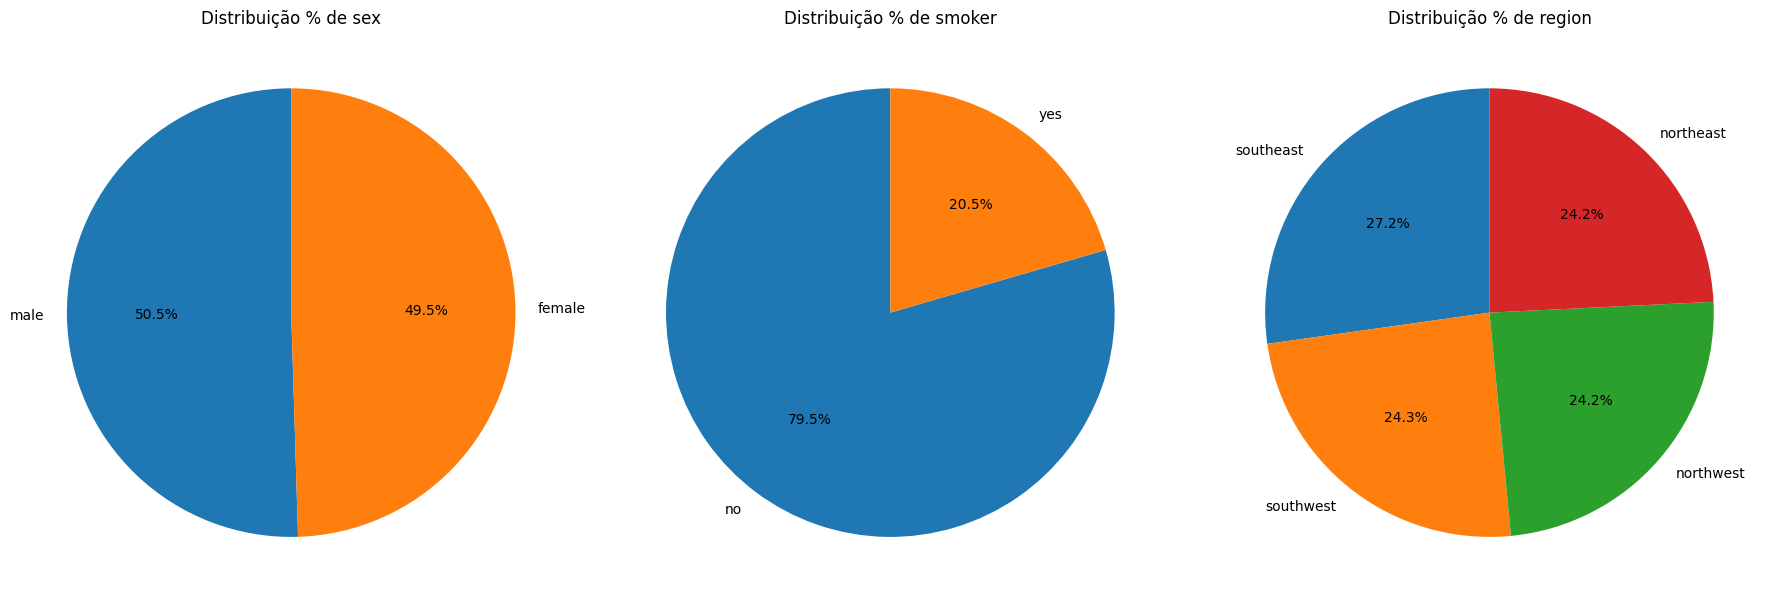

In [238]:
features = ['sex', 'smoker', 'region']

fig, axs = plt.subplots(1,3, figsize=(18,6))

for i, feature in enumerate(features):
    counts = df[feature].value_counts(normalize=True) * 100

    counts.plot.pie(
        ax= axs[i],
        autopct='%1.1f%%',
        startangle=90,
        legend=False,
        ylabel='', 
        title=f'Distribuição % de {feature}'
    )

plt.tight_layout()
plt.show()

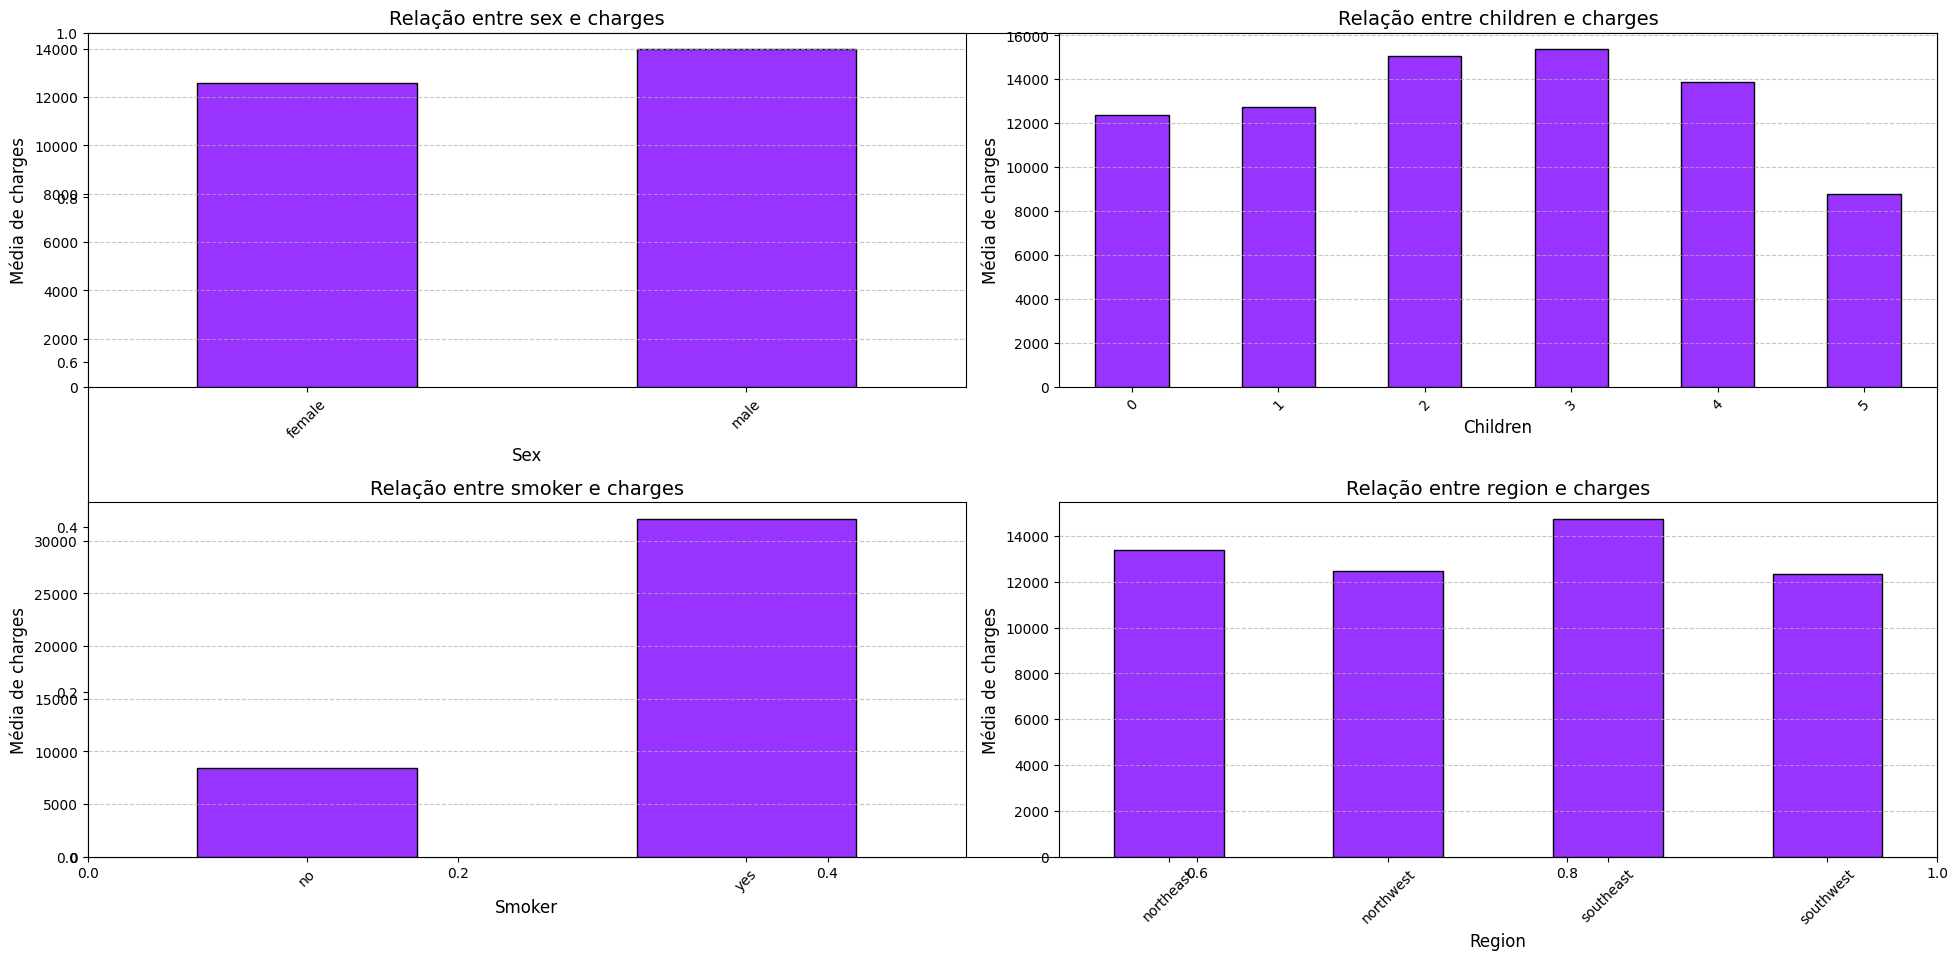

In [239]:
features = ['sex', 'children', 'smoker', 'region']


plt.subplots(figsize=(20, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1) 
    mean_charges = df.groupby(feature)['charges'].mean()  
    mean_charges.plot.bar(color='#9933ff', edgecolor='black')  
    

    plt.title(f'Relação entre {feature} e charges', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Média de charges', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

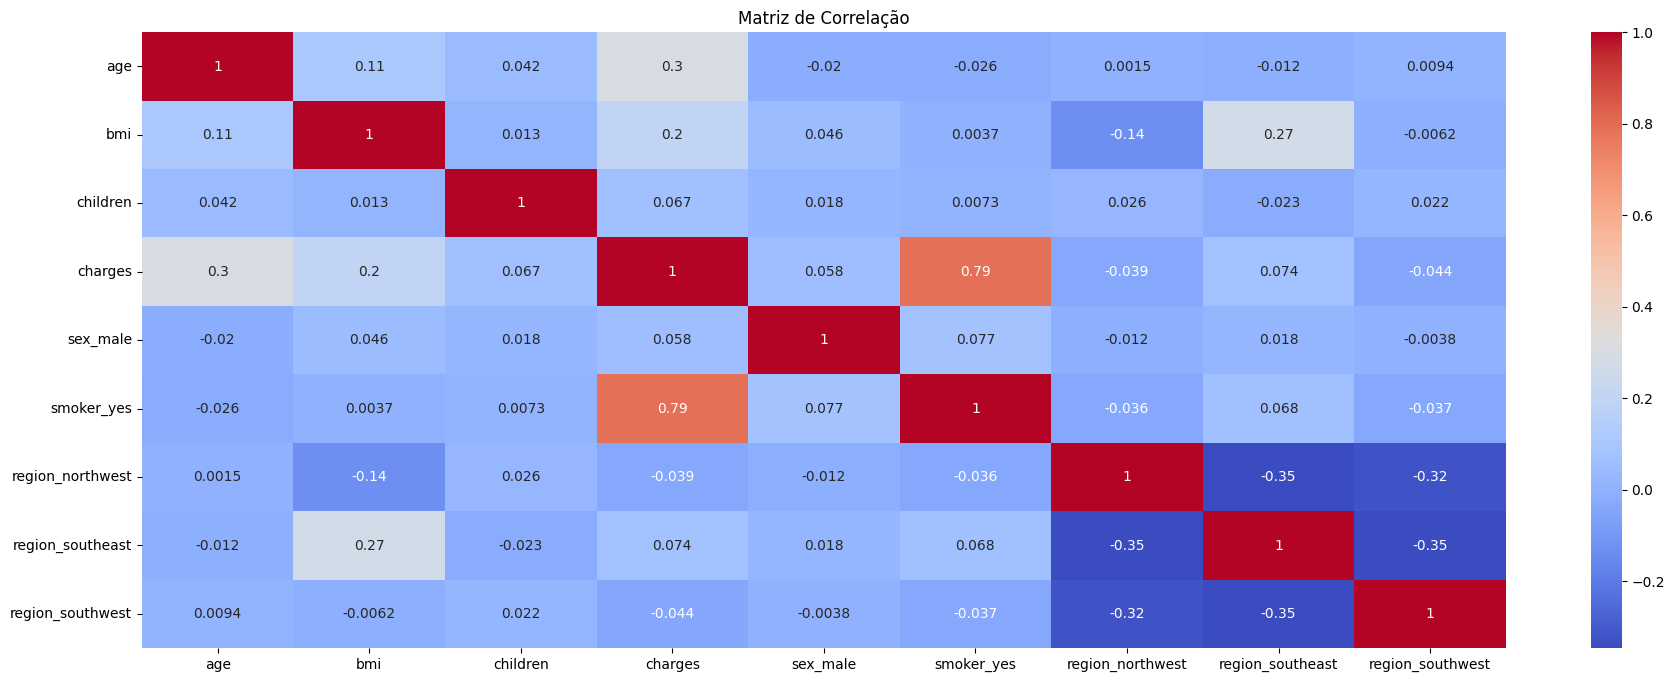

In [240]:
num_features = df.select_dtypes(include=np.number)
df_data_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

plt.figure(figsize=(22,8))

sns.heatmap(df_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')

plt.show()

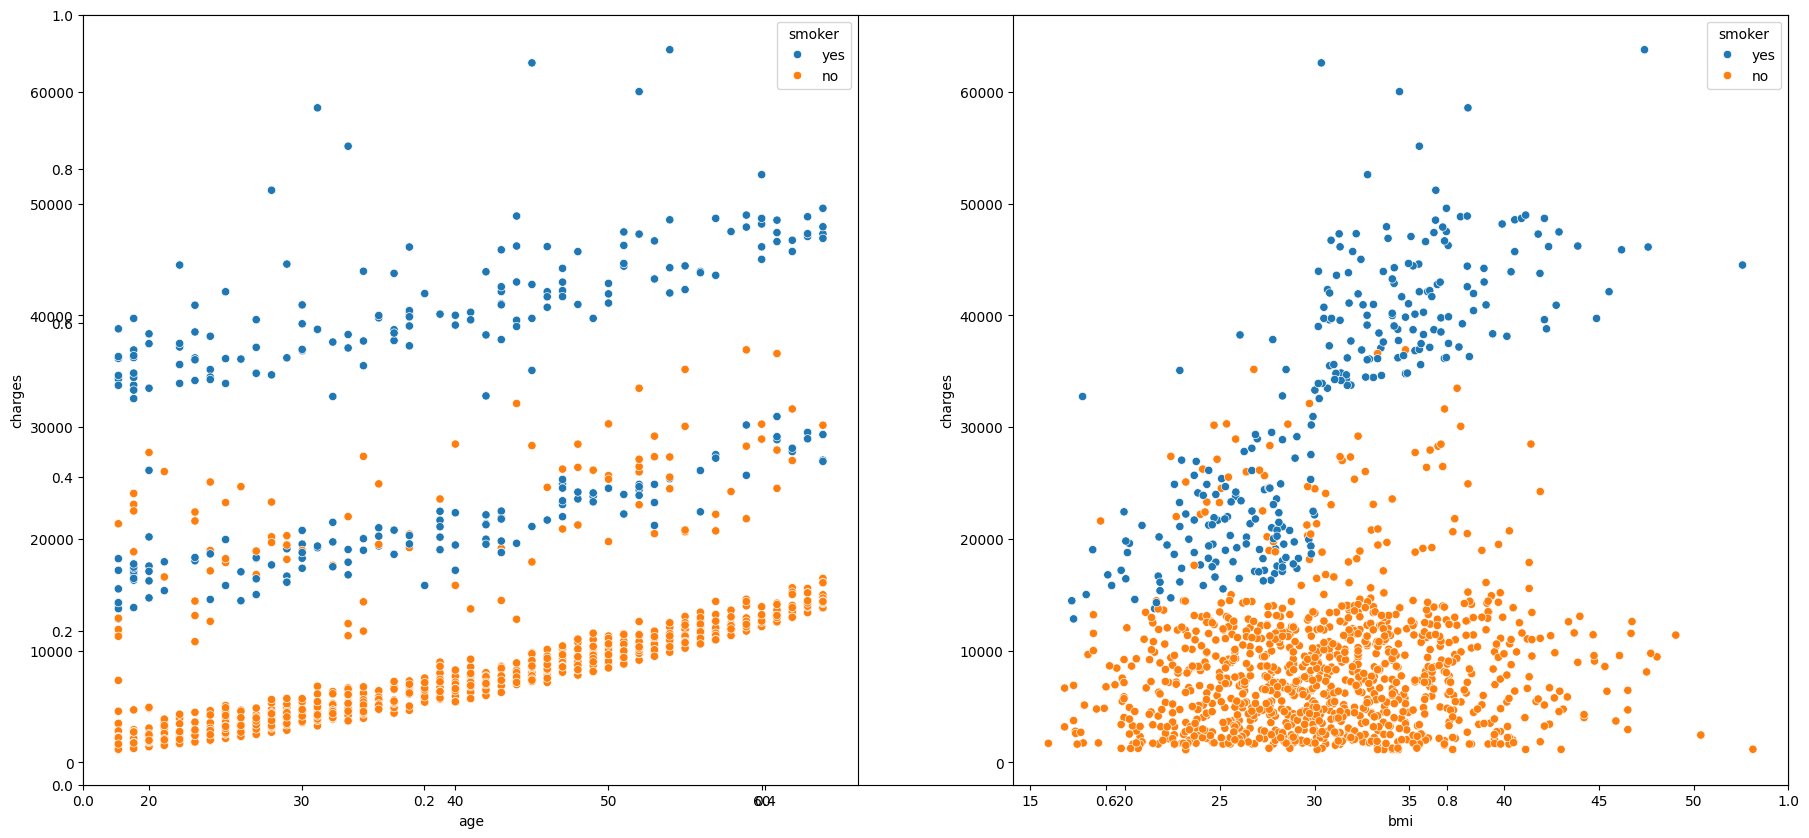

In [241]:
features = ['age', 'bmi']

plt.subplots(figsize = (22, 10))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data = df, x = feature, y = 'charges', hue = 'smoker')
plt.show()

Pré processamento

In [242]:
# Tratamento das variáveis categóricas
lbl_encoder = LabelEncoder()

df['sex'] = lbl_encoder.fit_transform(df['sex'])
df['smoker'] = lbl_encoder.fit_transform(df['smoker'])
df['region'] = lbl_encoder.fit_transform(df['region'])

# Separar features e target
X = df.drop('charges', axis=1)
y = df['charges']

# Normalizar as variáveis numéricas
scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']]) 


In [243]:
# Visualização dos dados processados
print('Colunas sem a target')
print(X.head())

print('\n*********************************\n')

print('Colunas target')
print(y.head())

Colunas sem a target
        age  sex       bmi  children  smoker  region
0 -1.440418    0 -0.453160 -0.909234       1       3
1 -1.511647    1  0.509422 -0.079442       0       2
2 -0.799350    1  0.383155  1.580143       0       2
3 -0.443201    1 -1.305052 -0.909234       0       1
4 -0.514431    1 -0.292456 -0.909234       0       1

*********************************

Colunas target
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [244]:
# Dividindo os dados de Treino e Teste
SEED = 42
TST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TST_SIZE, random_state=SEED)

In [245]:
# Verificar o tamanho dos conjuntos


print(f"Tamanho do conjunto de treino: {X_train.shape} = ({X_train.shape[0]}/{df.shape[0]} = {X_train.shape[0] / df.shape[0]:.2%})")

print(f"Tamanho do conjunto de treino: {X_test.shape} = ({X_test.shape[0]}/{df.shape[0]} = {X_test.shape[0] / df.shape[0]:.2%})")

print(f'Tamanho do dataframe: {df.shape[0]} linhas')

Tamanho do conjunto de treino: (1069, 6) = (1069/1337 = 79.96%)
Tamanho do conjunto de treino: (268, 6) = (268/1337 = 20.04%)
Tamanho do dataframe: 1337 linhas


In [246]:
# Aplicação dos modelos

# 1) Regressão Linear
lr = LinearRegression()

# 2) Arvore de decisão
dt = DecisionTreeRegressor(random_state=42)

# 3) Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)

In [247]:
# Treinamento dos modelos

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Modelos treinados: Regressão Linear, Arvore de decisão e Random Forest")

Modelos treinados: Regressão Linear, Arvore de decisão e Random Forest


In [248]:
# Função para avaliar os modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")
    return y_pred, rmse, r2

# Avaliar os modelos
lr_pred, lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test, "Regressão Linear")
dt_pred, dt_rmse, dt_r2 = evaluate_model(dt, X_test, y_test, "Árvore de Decisão")
rf_pred, rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test, "Random Forest")

Regressão Linear:
RMSE: 5957.6088
R²: 0.8068

Árvore de Decisão:
RMSE: 6340.1510
R²: 0.7812

Random Forest:
RMSE: 4639.4810
R²: 0.8829



In [249]:
# 💡Insights
# RMSE menor é melhor pois indica melhor acurácia nas previsões
# R² mais próximo de 1 indica melhor explicação da variância

# ✅ Conclusões
# Random Forest com melhor desempenho, Random Forest em seguida
# Árvores de decisão (pode sofrer o overfiting que significa que os dados de treino sao bons porém os de teste não Fonte: https://didatica.tech/underfitting-e-overfitting/)